Total unique models found for 1x1 grid: 6
Target model not found.
Total unique models found for 2x2 grid: 82
Hurray, found it in 79 iterations
Total unique models found for 3x3 grid: 2604
Target model not found.
Total unique models found for 4x4 grid: 193662
Target model not found.


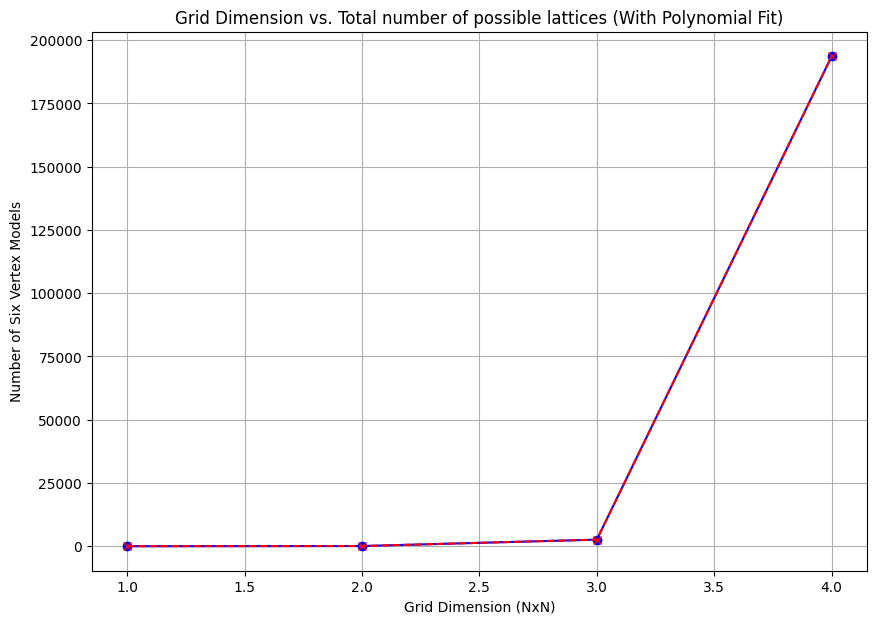

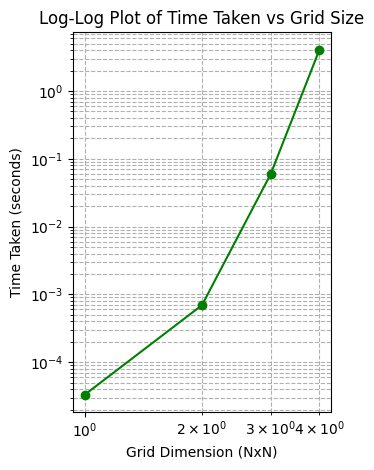

'for idx, model in enumerate(unique_models, start=1):\n    print(f"Model {idx}:")\n    print_model(model)'

In [1]:
# Define the six types of vertices in the six-vertex model
# Each tuple represents (top, right, bottom, left) where 1 means outgoing and -1 means incoming

import matplotlib.pyplot as plt
import numpy as np
import time

vertices = [
    (1, 1, -1, -1),   # Type 1
    (-1, -1, 1, 1),   # Type 2
    (1, -1, -1, 1),   # Type 3
    (-1, 1, 1, -1),   # Type 4
    (1, -1, 1, -1),   # Type 5
    (-1, 1, -1, 1)    # Type 6
]

def model_to_tuple(model):
    """
    Converts the model (grid) to a tuple of tuples for comparison and hashing.
    :param model: The grid model to convert.
    :return: Tuple of tuples representing the model.
    """
    return tuple(tuple(row) for row in model)

def is_valid_vertex(i, j, vertex, model):
    """
    Checks if placing the given vertex at position (i, j) maintains the six-vertex model constraints,
    specifically alternating signs for adjacent edges.
    """
    # Check top-bottom consistency with the top neighbor
    if i > 0 and model[i - 1][j] is not None:
        top_neighbor = model[i - 1][j]
        if top_neighbor[2] == vertex[0]:  # Bottom of top neighbor should be opposite to top of current vertex
            return False
    # Check left-right consistency with the left neighbor
    if j > 0 and model[i][j - 1] is not None:
        left_neighbor = model[i][j - 1]
        if left_neighbor[1] == vertex[3]:  # Right of left neighbor should be opposite to left of current vertex
            return False
    return True

def backtrack_model(i, j, grid_size, model, unique_models):
    """
    Recursive function to build and store unique six-vertex models using backtracking.
    """
    if i == grid_size:  # Entire grid is filled
        unique_models.add(model_to_tuple(model))  # Store the model as a unique configuration
        return

    # Move to the next cell in row-major order
    next_i, next_j = (i, j + 1) if (j + 1) < grid_size else (i + 1, 0)

    for vertex in vertices:
        if is_valid_vertex(i, j, vertex, model):
            model[i][j] = vertex  # Place vertex
            backtrack_model(next_i, next_j, grid_size, model, unique_models)  # Recurse to next cell
            model[i][j] = None  # Backtrack

def find_all_unique_models(grid_size):
    """
    Finds all unique six-vertex models for a given grid size using backtracking.
    :param grid_size: Size of the grid (NxN).
    :return: A list of unique six-vertex models.
    """
    unique_models = set()
    model = [[None for _ in range(grid_size)] for _ in range(grid_size)]
    backtrack_model(0, 0, grid_size, model, unique_models)
    return list(unique_models)

def polynomial(x):
    return 31015 * x**3 - 184867 * x**2 + 337572 * x - 183714



'''def print_model(model):
    """
    Prints a six-vertex model in a readable format.
    :param model: The model to print.
    """
    for row in model:
        row_str = " ".join([str(v) for v in row])
        print(row_str)
    print("\n")'''


target_model = [
    [(1, -1, -1, 1), (1, -1, -1, 1)],
    [(1, -1, 1, -1), (1, -1, -1, 1)]
]

grid_sizes = list(range(1, 5))
unique_model_counts = []
times_taken = []

for grid_size in grid_sizes:
    start_time = time.time()
    unique_models = find_all_unique_models(grid_size)
    end_time = time.time()
    time_taken = end_time - start_time
    times_taken.append(time_taken)
    unique_model_counts.append(len(unique_models))
    print(f"Total unique models found for {grid_size}x{grid_size} grid: {len(unique_models)}")
    '''for idx, model in enumerate(unique_models, start=1):
        print(f"Model {idx}:")
        print_model(model)'''

    target_tuple = model_to_tuple(target_model)
    found = False
    for idx, model in enumerate(unique_models, start=1):
        if model == target_tuple:
            print(f"Hurray, found it in {idx} iterations")
            found = True
            break
    if not found:
        print("Target model not found.")


x_values = np.array(grid_sizes)
polynomial_y_values = polynomial(x_values)

plt.figure(figsize=(10, 7))
plt.plot(grid_sizes, unique_model_counts, marker='o', linestyle='-', color='b')
plt.plot(x_values, polynomial_y_values, marker='x', linestyle='--', color='r', label="Polynomial Fit")
plt.title("Grid Dimension vs. Total number of possible lattices (With Polynomial Fit)")
plt.xlabel("Grid Dimension (NxN)")
plt.ylabel("Number of Six Vertex Models")
plt.grid(True)
plt.show()

plt.subplot(1, 2, 2)
plt.loglog(grid_sizes, times_taken, marker='o', color='g')
plt.title("Log-Log Plot of Time Taken vs Grid Size")
plt.xlabel("Grid Dimension (NxN)")
plt.ylabel("Time Taken (seconds)")
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()
# Print each unique model
'''for idx, model in enumerate(unique_models, start=1):
    print(f"Model {idx}:")
    print_model(model)'''
